In [28]:
import pandas as pd
import matplotlib.pyplot as plt
Z = 1.96


In [29]:
path = "../../Risultati/Chlorine/rf_classification.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.793202
1,100,none,none,0.782348
2,100,none,none,0.791774
3,100,none,none,0.784633
4,100,none,none,0.789203
...,...,...,...,...
595,50,iforest,interpolation,0.617252
596,50,hst,drop,0.779829
597,50,hst,LOCF,0.728078
598,50,hst,mean,0.728363


In [30]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,imputation,r2


In [31]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [32]:
df

,percentage,outlier,imputation,r2
0,100,none,none,0.793202
1,100,none,none,0.782348
2,100,none,none,0.791774
3,100,none,none,0.784633
4,100,none,none,0.789203
...,...,...,...,...
595,50,iforest,interpolation,0.617252
596,50,hst,drop,0.779829
597,50,hst,LOCF,0.728078
598,50,hst,mean,0.728363


In [33]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                       percentage        r2
outlier imputation                         
iforest drop            68.571429  0.786179
hst     drop            68.571429  0.783092
none    none            73.548387  0.780708
lof     drop            68.888889  0.767178
hst     interpolation   68.888889  0.686106
        mean            68.571429  0.685290
        LOCF            68.571429  0.683005
iforest interpolation   68.571429  0.617856
        LOCF            68.571429  0.613441
lof     mean            68.888889  0.611825
iforest mean            68.571429  0.607728
lof     LOCF            68.888889  0.585190
        interpolation   68.888889  0.584254
z       LOCF            68.888889  0.517543
        interpolation   68.888889  0.516844
        mean            68.888889  0.514155
        drop            68.888889  0.000000


In [34]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))
df_none

,percentage,mean,std,CI_Min,CI_Max
0,50,0.773303,0.003593,0.769781,0.776824
1,60,0.775969,0.002797,0.773228,0.778710
2,70,0.781681,0.003250,0.778496,0.784866
3,80,0.782776,0.000202,0.782578,0.782974
4,90,0.784919,0.001399,0.783547,0.786290
5,100,0.788232,0.004630,0.783694,0.792770


In [35]:
df_z_drop = df[(df['outlier'] == 'z') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop['CI_Min'] = df_z_drop['mean'] - Z * (df_z_drop['std'] / (4 ** 0.5))
df_z_drop['CI_Max'] = df_z_drop['mean'] + Z * (df_z_drop['std'] / (4 ** 0.5))
df_z_drop

,percentage,mean,std,CI_Min,CI_Max
0,50,0.0,0.0,0.0,0.0
1,60,0.0,0.0,0.0,0.0
2,70,0.0,0.0,0.0,0.0
3,80,0.0,0.0,0.0,0.0
4,90,0.0,0.0,0.0,0.0


In [36]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf['CI_Min'] = df_z_locf['mean'] - Z * (df_z_locf['std'] / (4 ** 0.5))
df_z_locf['CI_Max'] = df_z_locf['mean'] + Z * (df_z_locf['std'] / (4 ** 0.5))
df_z_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.511889,0.008644,0.503418,0.520361
1,60,0.518066,0.004813,0.513350,0.522783
2,70,0.518530,0.002644,0.515939,0.521122
3,80,0.517923,0.005676,0.512361,0.523486
4,90,0.521494,0.003026,0.518529,0.524459


In [37]:
df_z_mean = df[(df['outlier'] == 'z') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_mean['CI_Min'] = df_z_mean['mean'] - Z * (df_z_mean['std'] / (4 ** 0.5))
df_z_mean['CI_Max'] = df_z_mean['mean'] + Z * (df_z_mean['std'] / (4 ** 0.5))
df_z_mean

,percentage,mean,std,CI_Min,CI_Max
0,50,0.501000,0.007861,0.493296,0.508704
1,60,0.514353,0.007974,0.506539,0.522168
2,70,0.519923,0.002726,0.517252,0.522594
3,80,0.518852,0.001958,0.516933,0.520771
4,90,0.518995,0.001496,0.517529,0.520461


In [38]:
df_z_int = df[(df['outlier'] == 'z') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_int['CI_Min'] = df_z_int['mean'] - Z * (df_z_int['std'] / (4 ** 0.5))
df_z_int['CI_Max'] = df_z_int['mean'] + Z * (df_z_int['std'] / (4 ** 0.5))
df_z_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.510461,0.007496,0.503115,0.517807
1,60,0.516710,0.004259,0.512536,0.520883
2,70,0.518352,0.002888,0.515522,0.521182
3,80,0.519923,0.002483,0.517489,0.522356
4,90,0.520316,0.003501,0.516884,0.523747


In [39]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop['CI_Min'] = df_lof_drop['mean'] - Z * (df_lof_drop['std'] / (4 ** 0.5))
df_lof_drop['CI_Max'] = df_lof_drop['mean'] + Z * (df_lof_drop['std'] / (4 ** 0.5))
df_lof_drop

,percentage,mean,std,CI_Min,CI_Max
0,50,0.745971,0.008715,0.737431,0.754512
1,60,0.763590,0.007065,0.756667,0.770514
2,70,0.769957,0.003505,0.766522,0.773392
3,80,0.777255,0.002225,0.775075,0.779436
4,90,0.784157,0.006742,0.777550,0.790764


In [40]:
df_lof_locf = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf['CI_Min'] = df_lof_locf['mean'] - Z * (df_lof_locf['std'] / (4 ** 0.5))
df_lof_locf['CI_Max'] = df_lof_locf['mean'] + Z * (df_lof_locf['std'] / (4 ** 0.5))
df_lof_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.515674,0.010312,0.505568,0.525780
1,60,0.550736,0.012317,0.538665,0.562806
2,70,0.555984,0.007051,0.549074,0.562894
3,80,0.633033,0.008484,0.624719,0.641348
4,90,0.694444,0.007679,0.686919,0.701970


In [41]:
df_lof_mean = df[(df['outlier'] == 'lof') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_mean['CI_Min'] = df_lof_mean['mean'] - Z * (df_lof_mean['std'] / (4 ** 0.5))
df_lof_mean['CI_Max'] = df_lof_mean['mean'] + Z * (df_lof_mean['std'] / (4 ** 0.5))
df_lof_mean

,percentage,mean,std,CI_Min,CI_Max
0,50,0.521601,0.012045,0.509797,0.533405
1,60,0.579692,0.004859,0.574929,0.584454
2,70,0.611432,0.010317,0.601322,0.621543
3,80,0.661811,0.002490,0.659371,0.664251
4,90,0.709583,0.008330,0.701420,0.717746


In [42]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_int['CI_Min'] = df_lof_int['mean'] - Z * (df_lof_int['std'] / (4 ** 0.5))
df_lof_int['CI_Max'] = df_lof_int['mean'] + Z * (df_lof_int['std'] / (4 ** 0.5))
df_lof_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.519066,0.002843,0.516280,0.521852
1,60,0.549986,0.016192,0.534118,0.565854
2,70,0.549807,0.010478,0.539539,0.560075
3,80,0.631748,0.012764,0.619239,0.644257
4,90,0.694409,0.004481,0.690017,0.698800


In [43]:
df_if_drop = df[(df['outlier'] == 'iforest') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_if_drop['CI_Min'] = df_if_drop['mean'] - Z * (df_if_drop['std'] / (4 ** 0.5))
df_if_drop['CI_Max'] = df_if_drop['mean'] + Z * (df_if_drop['std'] / (4 ** 0.5))
df_if_drop

,percentage,mean,std,CI_Min,CI_Max
0,50,0.773234,0.004221,0.769097,0.777371
1,60,0.784972,0.008454,0.776688,0.793257
2,70,0.785147,0.005030,0.780217,0.790076
3,80,0.793115,0.003925,0.789269,0.796962
4,90,0.798761,0.003854,0.794984,0.802538


In [44]:
df_if_locf = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'LOCF')].groupby(['percentage'])['r2'].agg(
    ['mean', 'std']).reset_index()
df_if_locf['CI_Min'] = df_if_locf['mean'] - Z * (df_if_locf['std'] / (4 ** 0.5))
df_if_locf['CI_Max'] = df_if_locf['mean'] + Z * (df_if_locf['std'] / (4 ** 0.5))
df_if_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.613003,0.004584,0.608511,0.617496
1,60,0.631462,0.005168,0.626398,0.636527
2,70,0.606398,0.007065,0.599475,0.613321
3,80,0.605636,0.005399,0.600345,0.610928
4,90,0.605827,0.005776,0.600167,0.611487


In [45]:
df_if_mean = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'mean')].groupby(['percentage'])['r2'].agg(
    ['mean', 'std']).reset_index()
df_if_mean['CI_Min'] = df_if_mean['mean'] - Z * (df_if_mean['std'] / (4 ** 0.5))
df_if_mean['CI_Max'] = df_if_mean['mean'] + Z * (df_if_mean['std'] / (4 ** 0.5))
df_if_mean

,percentage,mean,std,CI_Min,CI_Max
0,50,0.611897,0.012235,0.599906,0.623887
1,60,0.601007,0.007802,0.593361,0.608653
2,70,0.608255,0.016740,0.591849,0.624660
3,80,0.610397,0.013017,0.597640,0.623154
4,90,0.608755,0.015093,0.593963,0.623546


In [46]:
df_if_int = df[(df['outlier'] == 'iforest') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_if_int['CI_Min'] = df_if_int['mean'] - Z * (df_if_int['std'] / (4 ** 0.5))
df_if_int['CI_Max'] = df_if_int['mean'] + Z * (df_if_int['std'] / (4 ** 0.5))
df_if_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.613182,0.005400,0.607890,0.618474
1,60,0.634783,0.004503,0.630370,0.639196
2,70,0.611004,0.008264,0.602906,0.619102
3,80,0.612396,0.007680,0.604870,0.619923
4,90,0.614503,0.006486,0.608146,0.620860


In [47]:
df_hst_drop = df[(df['outlier'] == 'hst') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop['CI_Min'] = df_hst_drop['mean'] - Z * (df_hst_drop['std'] / (4 ** 0.5))
df_hst_drop['CI_Max'] = df_hst_drop['mean'] + Z * (df_hst_drop['std'] / (4 ** 0.5))
df_hst_drop

,percentage,mean,std,CI_Min,CI_Max
0,50,0.776710,0.002671,0.774092,0.779328
1,60,0.781866,0.006259,0.775732,0.787999
2,70,0.783773,0.003187,0.780650,0.786896
3,80,0.784317,0.004504,0.779903,0.788731
4,90,0.789559,0.007059,0.782641,0.796477


In [48]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf['CI_Min'] = df_hst_locf['mean'] - Z * (df_hst_locf['std'] / (4 ** 0.5))
df_hst_locf['CI_Max'] = df_hst_locf['mean'] + Z * (df_hst_locf['std'] / (4 ** 0.5))
df_hst_locf

,percentage,mean,std,CI_Min,CI_Max
0,50,0.716367,0.006923,0.709582,0.723151
1,60,0.704941,0.011309,0.693858,0.716025
2,70,0.694123,0.019888,0.674633,0.713613
3,80,0.683043,0.009851,0.673389,0.692696
4,90,0.616574,0.019174,0.597784,0.635364


In [49]:
df_hst_mean = df[(df['outlier'] == 'hst') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_mean['CI_Min'] = df_hst_mean['mean'] - Z * (df_hst_mean['std'] / (4 ** 0.5))
df_hst_mean['CI_Max'] = df_hst_mean['mean'] + Z * (df_hst_mean['std'] / (4 ** 0.5))
df_hst_mean

,percentage,mean,std,CI_Min,CI_Max
0,50,0.713439,0.008552,0.705058,0.721820
1,60,0.701514,0.011546,0.690199,0.712829
2,70,0.697229,0.012275,0.685200,0.709259
3,80,0.692850,0.006553,0.686428,0.699272
4,90,0.626143,0.020785,0.605773,0.646512


In [50]:
df_hst_int= df[(df['outlier'] == 'hst') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_int['CI_Min'] = df_hst_int['mean'] - Z * (df_hst_int['std'] / (4 ** 0.5))
df_hst_int['CI_Max'] = df_hst_int['mean'] + Z * (df_hst_int['std'] / (4 ** 0.5))
df_hst_int

,percentage,mean,std,CI_Min,CI_Max
0,50,0.719901,0.007728,0.712328,0.727475
1,60,0.707512,0.014931,0.692880,0.722145
2,70,0.697336,0.021812,0.675961,0.718712
3,80,0.684162,0.012423,0.671987,0.696336
4,90,0.620644,0.021831,0.599249,0.642039


[]

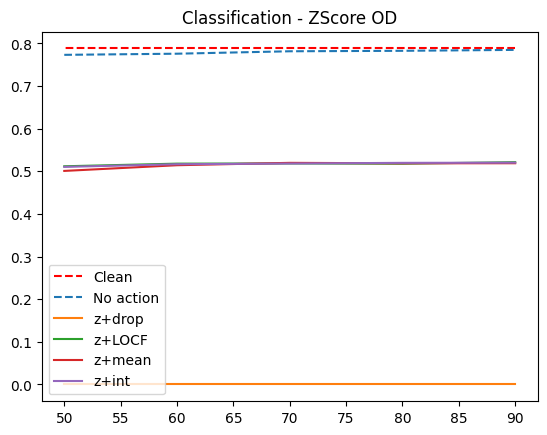

In [51]:
#plt.fill_between(df_none['percentage'].iloc[:-1],df_none['CI_Min'].iloc[:-1],df_none['CI_Max'].iloc[:-1],alpha=.05)
#plt.fill_between(df_z_locf['percentage'],df_z_locf['CI_Min'],df_z_locf['CI_Max'],alpha=.05)
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
plt.plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
plt.plot(df_z_locf['percentage'],df_z_locf['mean'], label='z+LOCF')
plt.plot(df_z_mean['percentage'],df_z_mean['mean'], label='z+mean')
plt.plot(df_z_int['percentage'],df_z_int['mean'], label='z+int')
plt.title("Classification - ZScore OD")
plt.legend()
plt.plot()

[]

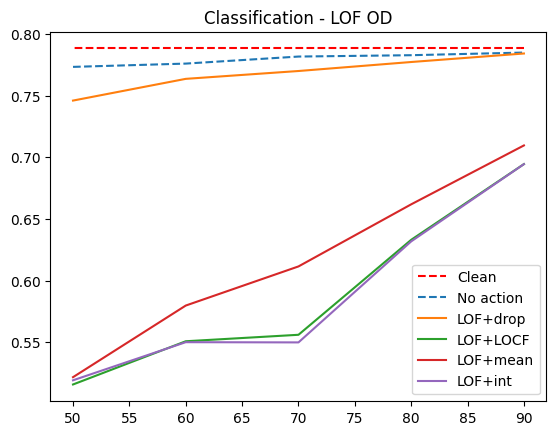

In [52]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
plt.plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
plt.plot(df_lof_locf['percentage'],df_lof_locf['mean'], label='LOF+LOCF')
plt.plot(df_lof_mean['percentage'],df_lof_mean['mean'], label='LOF+mean')
plt.plot(df_lof_int['percentage'],df_lof_int['mean'], label='LOF+int')
plt.title("Classification - LOF OD")
plt.legend()
plt.plot()

[]

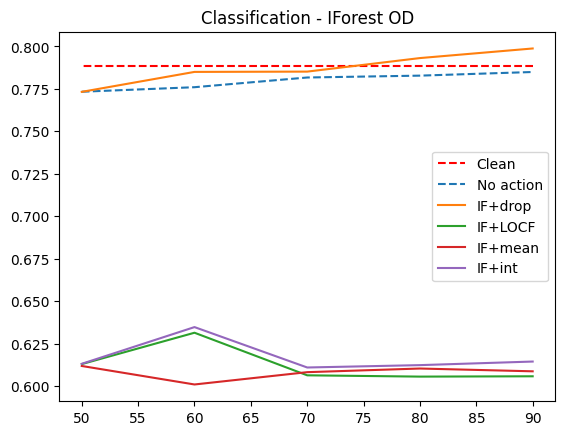

In [53]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
plt.plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
plt.plot(df_if_locf['percentage'],df_if_locf['mean'], label='IF+LOCF')
plt.plot(df_if_mean['percentage'],df_if_mean['mean'], label='IF+mean')
plt.plot(df_if_int['percentage'],df_if_int['mean'], label='IF+int')
plt.title("Classification - IForest OD")
plt.legend()
plt.plot()

[]

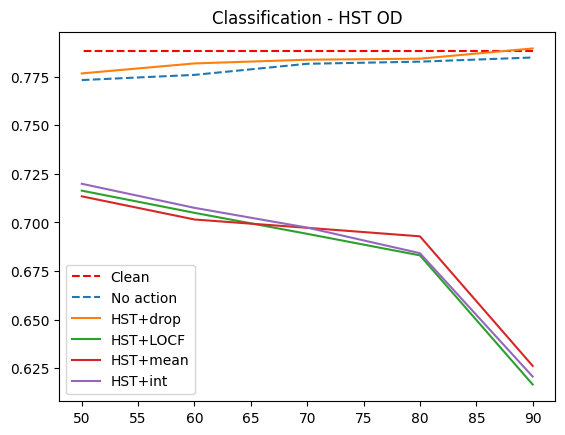

In [54]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
plt.plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
plt.plot(df_hst_locf['percentage'],df_hst_locf['mean'], label='HST+LOCF')
plt.plot(df_hst_mean['percentage'],df_hst_mean['mean'], label='HST+mean')
plt.plot(df_hst_int['percentage'],df_hst_int['mean'], label='HST+int')
plt.title("Classification - HST OD")
plt.legend()
plt.plot()